# This is a demo notebook to showcase the functionality of the Multimodal AI Caption Matcher project.

Project overview

Markdown cell explaining the project goals and components.

Setup and imports

Code cell to install dependencies (if necessary) and import modules:

In [2]:
import sys
from pathlib import Path

# Add the project root (one level up) to sys.path
project_root = Path.cwd().parent  # if your notebook is in notebooks/
sys.path.insert(0, str(project_root))

from src.image_processor import ImageProcessor
from src.embedding_generator import EmbeddingGenerator
from src.caption_matcher import CaptionMatcher
from configs.config import CLIP_MODEL_NAME


Load sample image

Code cell to load an example image from data/sample_images:

In [3]:
image_path = "../data/sample_images/flower.jpg"

Process image and generate embeddings

Instantiate components and run the pipeline interactively:

In [15]:
image_processor = ImageProcessor(CLIP_MODEL_NAME)
embedding_generator = EmbeddingGenerator(CLIP_MODEL_NAME)
caption_matcher = CaptionMatcher()

inputs, processor = image_processor.process_image_pipeline(image_path)
image_embeddings, clip_model = embedding_generator.generate_image_embeddings(inputs)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:src.image_processor:Successfully initialized CLIP processor: openai/clip-vit-base-patch32
INFO:src.embedding_generator:Using device: cpu
INFO:src.embedding_generator:Successfully loaded CLIP model: openai/clip-vit-base-patch32
INFO:src.embedding_generator:Model loaded on device: cpu
INFO:src.caption_matcher:Initialized caption matcher with 74 captions
INFO:src.image_processor:Successfully loaded image: flower.jpg
INFO:src.image_processor:Image preprocessing completed successfully
INFO:src.embedding_generator:Extracted visual features with shape: torch.Size([1, 512])
INFO:src.embedding_generator:Image embeddings generated and normalized successfully


Match captions and display results

In [19]:
results = caption_matcher.match_image_captions(
    image_embeddings,
    clip_model=embedding_generator.clip_model,
    text_processor=image_processor.clip_processor,
    top_k=5
)

INFO:src.caption_matcher:Matching image against 74 captions
INFO:src.caption_matcher:Generated text embeddings for 74 captions
INFO:src.caption_matcher:Computed similarity matrix with shape: (1, 74)
INFO:src.caption_matcher:Ranked top 5 captions by similarity


In [20]:
print(results[:3])

(['The essence of nature.', 'Your ticket to tranquility.', 'The warmth of belonging.', 'Your daily dose of delight.', 'A moment to enjoy.'], [0.25163817405700684, 0.23745273053646088, 0.22949689626693726, 0.22928252816200256, 0.22648170590400696])


In [21]:
captions, scores = results

for idx, (caption, score) in enumerate(zip(captions, scores), 1):
    print(f"{idx}. {caption} (score: {score:.4f})")


1. The essence of nature. (score: 0.2516)
2. Your ticket to tranquility. (score: 0.2375)
3. The warmth of belonging. (score: 0.2295)
4. Your daily dose of delight. (score: 0.2293)
5. A moment to enjoy. (score: 0.2265)


Optional: Visualize image

Use matplotlib to display the image:

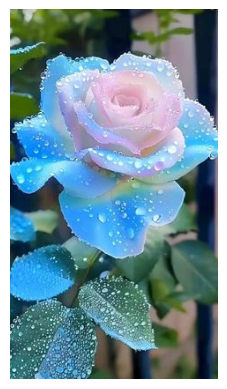

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

Experiment

Add cells to test with different images, tweak top_k, or try your own caption lists.